In [10]:
import tensorflow as tf

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


2.16.1
Num GPUs Available:  1


In [11]:
import pandas as pd
import json
# Load the datasets
train_data_path = './train.json' # Update this path
test_data_path = './test.json'   # Update this path

# Load the JSON data from the file
with open(train_data_path, 'r') as file:
    data = json.load(file)
    # Convert the loaded JSON data into a pandas DataFrame
    train_df = pd.DataFrame(data)
with open(test_data_path, 'r') as file:
    data = json.load(file)
    # Convert the loaded JSON data into a pandas DataFrame
    test_df = pd.DataFrame(data)
# Quick look at the data structure
print(train_df.head())
print(test_df.head())
print(train_df.info())


   document                                          full_text  \
0         7  Design Thinking for innovation reflexion-Avril...   
1        10  Diego Estrada\n\nDesign Thinking Assignment\n\...   
2        16  Reporting process\n\nby Gilberto Gamboa\n\nCha...   
3        20  Design Thinking for Innovation\n\nSindy Samaca...   
4        56  Assignment:  Visualization Reflection  Submitt...   

                                              tokens  \
0  [Design, Thinking, for, innovation, reflexion,...   
1  [Diego, Estrada, \n\n, Design, Thinking, Assig...   
2  [Reporting, process, \n\n, by, Gilberto, Gambo...   
3  [Design, Thinking, for, Innovation, \n\n, Sind...   
4  [Assignment, :,   , Visualization,  , Reflecti...   

                                 trailing_whitespace  \
0  [True, True, True, True, False, False, True, F...   
1  [True, False, False, True, True, False, False,...   
2  [True, False, False, True, True, False, False,...   
3  [True, True, True, False, False, True, 

In [12]:
pii_types = [label for sublist in train_df['labels'].tolist() for label in sublist]
pii_types_df = pd.DataFrame(pii_types, columns=['PII_Type'])

# View the distribution of PII types
print(pii_types_df['PII_Type'].value_counts())

PII_Type
O                   4989794
B-NAME_STUDENT         1365
I-NAME_STUDENT         1096
B-URL_PERSONAL          110
B-ID_NUM                 78
B-EMAIL                  39
I-STREET_ADDRESS         20
I-PHONE_NUM              15
B-USERNAME                6
B-PHONE_NUM               6
B-STREET_ADDRESS          2
I-URL_PERSONAL            1
I-ID_NUM                  1
Name: count, dtype: int64


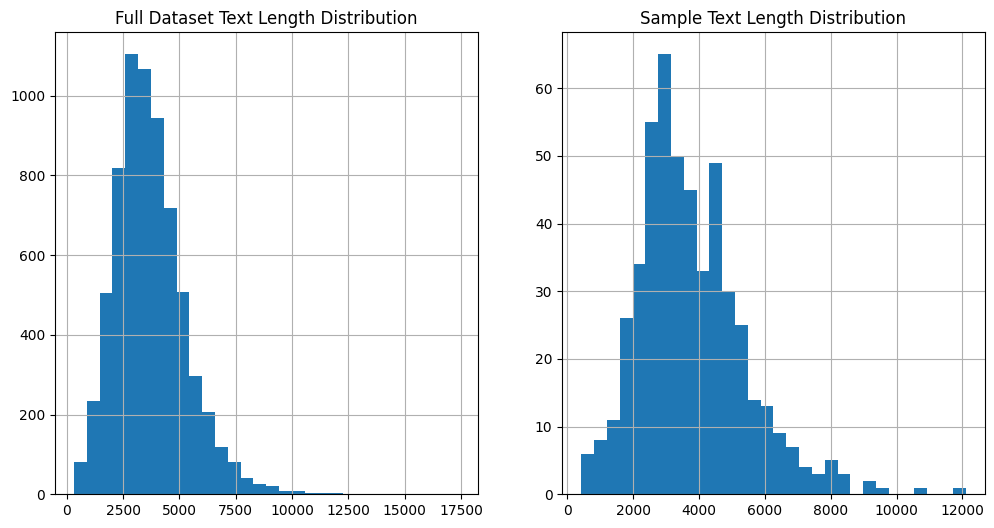

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document             6807 non-null   int64 
 1   full_text            6807 non-null   object
 2   tokens               6807 non-null   object
 3   trailing_whitespace  6807 non-null   object
 4   labels               6807 non-null   object
 5   text_length          6807 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 319.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 3817 to 669
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document             500 non-null    int64 
 1   full_text            500 non-null    object
 2   tokens               500 non-null    object
 3   trailing_whitespace  500 non-null    object
 4   labels               500 non-null    object


In [13]:
import pandas as pd

sample_df = train_df.sample(n=500, random_state=1)  # Randomly select 500 texts

import matplotlib.pyplot as plt

# Plotting the text length distribution for the full dataset and the sample
train_df['text_length'] = train_df['full_text'].apply(len)
sample_df['text_length'] = sample_df['full_text'].apply(len)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
train_df['text_length'].hist(ax=ax[0], bins=30)
ax[0].set_title('Full Dataset Text Length Distribution')
sample_df['text_length'].hist(ax=ax[1], bins=30)
ax[1].set_title('Sample Text Length Distribution')
plt.show()
print(train_df.info())
print(sample_df.info())


In [14]:
from transformers import BertTokenizerFast

# Initialize tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Example texts (ideally, these should be a representative sample of your dataset)
texts = sample_df['full_text']

# Tokenize texts and calculate the average token-per-word ratio
total_tokens = 0
total_words = 0

for text in texts:
    words = text.split()  # Split text into words
    total_words += len(words)
    tokens = tokenizer.tokenize(text)
    total_tokens += len(tokens)

average_tokens_per_word = total_tokens / total_words
print(f"Average tokens per word: {average_tokens_per_word}")

Token indices sequence length is longer than the specified maximum sequence length for this model (570 > 512). Running this sequence through the model will result in indexing errors


Average tokens per word: 1.1566877625567833


In [15]:
import pandas as pd

# Get the unique labels sorted by their frequency (descending order by default)
unique_labels = pii_types_df['PII_Type'].value_counts().index.tolist()

# Create a mapping from each label to a unique number
label_map = {label: idx for idx, label in enumerate(unique_labels)}

# Print the mapping
print(label_map)

label_map = {
    'O' : 0,
    'B-NAME_STUDENT': 1,
    'I-NAME_STUDENT': 2, 
    'B-URL_PERSONAL': 3, 
    'I-URL_PERSONAL': 4, 
    'B-ID_NUM': 5, 
    'I-ID_NUM': 6,
    'B-EMAIL': 7, 
    'I-EMAIL': 8,
    'B-STREET_ADDRESS': 9, 
    'I-STREET_ADDRESS': 10,
    'B-PHONE_NUM': 11, 
    'I-PHONE_NUM': 12, 
    'B-USERNAME': 13,
    'I-USERNAME': 14,
}
print(label_map)

{'O': 0, 'B-NAME_STUDENT': 1, 'I-NAME_STUDENT': 2, 'B-URL_PERSONAL': 3, 'B-ID_NUM': 4, 'B-EMAIL': 5, 'I-STREET_ADDRESS': 6, 'I-PHONE_NUM': 7, 'B-USERNAME': 8, 'B-PHONE_NUM': 9, 'B-STREET_ADDRESS': 10, 'I-URL_PERSONAL': 11, 'I-ID_NUM': 12}
{'O': 0, 'B-NAME_STUDENT': 1, 'I-NAME_STUDENT': 2, 'B-URL_PERSONAL': 3, 'I-URL_PERSONAL': 4, 'B-ID_NUM': 5, 'I-ID_NUM': 6, 'B-EMAIL': 7, 'I-EMAIL': 8, 'B-STREET_ADDRESS': 9, 'I-STREET_ADDRESS': 10, 'B-PHONE_NUM': 11, 'I-PHONE_NUM': 12, 'B-USERNAME': 13, 'I-USERNAME': 14}


In [16]:
from transformers import BertTokenizerFast

# Initialize the tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# Encode the text
original_text = train_df['full_text'].iloc[0]
original_tokens = train_df['tokens'].iloc[0]
original_labels = train_df['labels'].iloc[0]

full_text = original_text#"innovation reflexion-Avril 2021-Nathalie Sylla\n\n"
tokens = original_tokens#["innovation","reflexion","-","Avril","2021","-","Nathalie","Sylla","\n\n"]
labels = original_labels#["O","O","O","O","O","O","B-NAME_STUDENT","I-NAME_STUDENT","O"]

encoded = tokenizer.encode_plus(full_text, return_offsets_mapping=True, padding='max_length', truncation=True)
new_tokens = tokenizer.convert_ids_to_tokens(encoded['input_ids'])
# Print the result
print(new_tokens)
print(len(encoded['input_ids']))
print(encoded['input_ids'])
print(encoded['offset_mapping'])


['[CLS]', 'design', 'thinking', 'for', 'innovation', 'reflex', '##ion', '-', 'av', '##ril', '2021', '-', 'nat', '##hal', '##ie', 'sy', '##lla', 'challenge', '&', 'selection', 'the', 'tool', 'i', 'use', 'to', 'help', 'all', 'stakeholders', 'finding', 'their', 'way', 'through', 'the', 'complexity', 'of', 'a', 'project', 'is', 'the', 'mind', 'map', '.', 'what', 'exactly', 'is', 'a', 'mind', 'map', '?', 'according', 'to', 'the', 'definition', 'of', 'bu', '##zan', 't', '.', 'and', 'bu', '##zan', 'b', '.', '(', '1999', ',', 'des', '##sin', '##e', '-', 'moi', 'l', "'", 'intelligence', '.', 'paris', ':', 'les', 'editions', 'd', "'", 'organisation', '.', ')', ',', 'the', 'mind', 'map', '(', 'or', 'he', '##uri', '##stic', 'diagram', ')', 'is', 'a', 'graphic', 'representation', 'technique', 'that', 'follows', 'the', 'natural', 'functioning', 'of', 'the', 'mind', 'and', 'allows', 'the', 'brain', "'", 's', 'potential', 'to', 'be', 'released', '.', 'cf', 'annex', '##1', 'this', 'tool', 'has', 'many'

In [17]:
import pandas as pd
def segment_text_by_tokens(original_tokens, original_labels, max_length, overlap):
    # Adjust max_length to account for special tokens like [CLS] and [SEP] which are added by models like BERT
    max_length -= 2  # Assuming 2 special tokens: [CLS] and [SEP]

    segments = []
    current_tokens = []
    current_labels = []

    for token, label in zip(original_tokens, original_labels):
        # Check if adding the next token would exceed the max_length
        if len(current_tokens) >= max_length and current_tokens:
            # Finalize the current segment before the overflow
            segments.append({
                "text": ' '.join(current_tokens),
                "tokens": current_tokens,
                "labels": current_labels
            })
            # Start new segment with overlap if specified
            current_tokens = current_tokens[-overlap:] if overlap else []
            current_labels = current_labels[-overlap:] if overlap else []

        current_tokens.append(token)
        current_labels.append(label)
    
    # Add the last segment if there are remaining tokens
    if current_tokens:
        segments.append({
            "text": ' '.join(current_tokens),
            "tokens": current_tokens,
            "labels": current_labels
        })
    
    return segments


# Example usage
# original_text = "innovation reflexion-Avril 2021-Nathalie Sylla\n\n"
# original_tokens = ["innovation","reflexion","-","Avril","2021","-","Nathalie","Sylla","\n\n"]
# original_labels = ["O","O","O","O","O","O","B-NAME_STUDENT","I-NAME_STUDENT","O"]
# Average tokens per word: 1.1566877625567833
# 512 / 1.16 = 441
max_length = 441  # Maximum token count, including special tokens like [CLS] and [SEP]
overlap = 0  # Example overlap

def get_segment_df(df):
    all_segments = []
    j = 0
    for index, row in df.iterrows():
        # original_text = row['full_text']
        original_tokens = row['tokens']
        original_labels = row['labels']
        segments = segment_text_by_tokens(original_tokens, original_labels, max_length, overlap)
        for i, segment in enumerate(segments):
            # print(f"Segment {j}:")
            j += 1
            # print(f"Text: {segment['text']}")
            # print(f"Tokens: {segment['tokens']}")
            # print(f"Labels: {segment['labels']}\n")
            for segment in segments:
                all_segments.append({
                    "text": segment['text'],
                    "tokens": segment['tokens'],
                    "labels": segment['labels']
                })
    # Convert the list of dictionaries to a DataFrame
    segments_df = pd.DataFrame(all_segments)
    return segments_df
    
# Write the DataFrame to a Parquet file
segments_df = get_segment_df(train_df)
segments_df.to_parquet('segments.parquet', engine='pyarrow')

# test_segments_df = get_segment_df(test_df)
# test_segments_df.to_parquet('test_segments.parquet', engine='pyarrow')


In [10]:
# print(segments_df.head())
segments_df.info()
segments_df['tokens'][0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36311 entries, 0 to 36310
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    36311 non-null  object
 1   tokens  36311 non-null  object
 2   labels  36311 non-null  object
dtypes: object(3)
memory usage: 851.2+ KB


['Design',
 'Thinking',
 'for',
 'innovation',
 'reflexion',
 '-',
 'Avril',
 '2021',
 '-',
 'Nathalie',
 'Sylla',
 '\n\n',
 'Challenge',
 '&',
 'selection',
 '\n\n',
 'The',
 'tool',
 'I',
 'use',
 'to',
 'help',
 'all',
 'stakeholders',
 'finding',
 'their',
 'way',
 'through',
 'the',
 'complexity',
 'of',
 'a',
 'project',
 'is',
 'the',
 ' ',
 'mind',
 'map',
 '.',
 '\n\n',
 'What',
 'exactly',
 'is',
 'a',
 'mind',
 'map',
 '?',
 'According',
 'to',
 'the',
 'definition',
 'of',
 'Buzan',
 'T.',
 'and',
 'Buzan',
 'B.',
 '(',
 '1999',
 ',',
 'Dessine',
 '-',
 'moi',
 ' ',
 "l'intelligence",
 '.',
 'Paris',
 ':',
 'Les',
 'Éditions',
 "d'Organisation",
 '.',
 ')',
 ',',
 'the',
 'mind',
 'map',
 '(',
 'or',
 'heuristic',
 'diagram',
 ')',
 'is',
 'a',
 'graphic',
 ' ',
 'representation',
 'technique',
 'that',
 'follows',
 'the',
 'natural',
 'functioning',
 'of',
 'the',
 'mind',
 'and',
 'allows',
 'the',
 'brain',
 "'s",
 ' ',
 'potential',
 'to',
 'be',
 'released',
 '.',
 'Cf

In [32]:
from tqdm.notebook import tqdm 
# segment_text = segments[1]['text']
# segment_tokens = segments[1]['tokens']
# segment_labels = segments[1]['labels']
def tokenize_and_align_labels(segment_text, segment_tokens, segment_labels):
    # Step 1: Generate Original Token Offset Mapping
    original_token_offsets = []
    cursor = 0
    for token in segment_tokens:
        start = segment_text.find(token, cursor)
        end = start + len(token)
        cursor = end
        original_token_offsets.append((start, end))
    
    # Step 2: Tokenize and Align Labels
    encoded = tokenizer(segment_text, return_offsets_mapping=True, truncation=True, padding='max_length')
    input_ids = encoded['input_ids']
    new_tokens = tokenizer.convert_ids_to_tokens(encoded['input_ids'])
    new_labels = ['O'] * len(new_tokens)  # Initialize all labels as 'O'
    print(encoded['offset_mapping'])
    for i, offset in enumerate(encoded['offset_mapping']):
        if offset == (0, 0):  # Skip special tokens
            continue
        # Find the original token that encompasses the new token
        for j, (orig_start, orig_end) in enumerate(original_token_offsets):
            # Check if the new token is within the span of the original token
            if orig_start <= offset[0] and offset[1] <= orig_end:
                # Assign the original token's label to the new token
                if orig_start == offset[0]:
                    new_labels[i] = segment_labels[j]
                else:
                    new_labels[i] = segment_labels[j].replace('B-', 'I-')
                break

    # Handling subwords and continuation labels: Adjust the new_labels to use continuation labels ('I-') where necessary
    for i in range(1, len(new_labels)):
        if new_labels[i].startswith('B-') and new_labels[i-1] == new_labels[i].replace('B-', 'I-'):
            new_labels[i] = new_labels[i].replace('B-', 'I-')
    # Step 3: Review the results
    # print(new_tokens)
    # print(new_labels)
    # Convert segment labels to numeric and align with tokens
    numeric_label = [label_map[label] for label in new_labels]
    return segment_text, new_tokens, input_ids, new_labels, numeric_label, encoded['attention_mask']

def tokenize_and_align_labels_(segment_text, segment_tokens, segment_labels):
    # Step 1: Generate Original Token Offset Mapping
    original_token_offsets = []
    cursor = 0
    for token in segment_tokens:
        start = segment_text.find(token, cursor)
        end = start + len(token)
        cursor = end
        original_token_offsets.append((start, end))
    
    # Create a mapping from original token offsets to labels
    offset_to_label = {}
    for offset, label in zip(original_token_offsets, segment_labels):
        offset_to_label[offset] = label

    # Step 2: Tokenize and Align Labels
    encoded = tokenizer(segment_text, return_offsets_mapping=True, truncation=True, padding='max_length')
    input_ids = encoded['input_ids']
    offset_mapping = encoded['offset_mapping']
    attention_mask = encoded['attention_mask']
    new_tokens = tokenizer.convert_ids_to_tokens(encoded['input_ids'])
    new_mapping = [-1] * len(new_tokens)
    token_mapping = [""] * len(new_tokens)
    # Prepare to align new tokens with original labels
    new_labels = ['O'] * len(new_tokens) # Initialize all labels as 'O'
    # Unpack and transform a list of tuples into two separate lists
    orig_starts, orig_ends = zip(*original_token_offsets) if original_token_offsets else ([], [])
    j = 0  # Pointer for original_token_offsets

    for i, (start, end) in enumerate(offset_mapping):
        if start == 0 and end == 0:  # Skip special tokens. [CLS], [SEP], [PAD] are all (0, 0)
            continue
        # Move the original pointer to the right place
        while j < len(orig_starts) and orig_ends[j] < start:
            j += 1
        # Check if the new token is within the span of the original token
        if j < len(orig_starts) and orig_starts[j] <= start and end <= orig_ends[j]:
            # Assign the original token's label to the new token
            base_label = offset_to_label[(orig_starts[j], orig_ends[j])]
            if orig_starts[j] == start:
                new_labels[i] = base_label
            else:
                # Handling subwords and continuation labels: Adjust the new_labels to use continuation labels ('I-') where necessary
                if base_label.startswith('B-'):
                    new_labels[i] = 'I-' + base_label[2:]
                else:
                    new_labels[i] = base_label
            new_mapping[i] = j
            token_mapping[i] = segment_text[orig_starts[j]:orig_ends[j]]
    # Step 3: Review the results
    # print(new_tokens)
    # print(new_labels)
    # Convert segment labels to numeric and align with tokens
    numeric_label = [label_map[label] for label in new_labels]
    return new_tokens, input_ids, new_labels, numeric_label, attention_mask, new_mapping, token_mapping
tokenized_tokens = []
tokenized_labels = []
numeric_labels = [] # important
attention_masks = [] # important
tokenized_input_ids = [] # important
index_mappings = [] # important
token_mappings = [] # important
segments_df = pd.read_parquet('segments.parquet', engine='pyarrow')

for i, segment in tqdm(segments_df.iterrows(), total=segments_df.shape[0]):
    segment_new_tokens, input_ids, segment_new_labels, numeric_label, segment_attention_mask, index_mapping, token_mapping = tokenize_and_align_labels_(segment['text'], segment['tokens'], segment['labels'])
    tokenized_tokens.append(segment_new_tokens)
    tokenized_input_ids.append(input_ids)
    tokenized_labels.append(segment_new_labels)
    numeric_labels.append(numeric_label)
    attention_masks.append(segment_attention_mask)
    index_mappings.append(index_mapping)
    token_mappings.append(token_mapping)
    # print(f"Segment {i}:")
    # # print(f"Text: {segment['text']}")
    # print(f"Original_Tokens size {len(segment['tokens'])}: {segment['tokens']}")
    # print(f"Original_Labels size {len(segment['labels'])}: {segment['labels']}")
    # print(f"New_Tokens size {len(segment_new_tokens)}: {segment_new_tokens}")
    # print(f"Input_Ids size {len(input_ids)}: {input_ids}")
    # print(f"New_Labels size {len(segment_new_labels)}: {segment_new_labels}")
    # print(f"Numeric_Labels size {len(numeric_label)}: {numeric_label}")
    # print(f"Attention_Masks size {len(segment_attention_mask)}: {segment_attention_mask}")
    # print(f"index_mappings size {len(index_mapping)}: {index_mapping}")

print("----")

# print(numeric_labels)
# print(attention_masks)
# print(tokenized_input_ids)


  0%|          | 0/36311 [00:00<?, ?it/s]

----


In [38]:
_tokens = ["Design","Thinking","for","innovation","reflexion","-","Avril","2021","-","Nathalie","Sylla","Challenge","&","selection","The","tool","I","use","to","help","all","stakeholders","finding","their","way","through","the","complexity","of","a","project","is","the","mind","map",".","What","exactly","is","a","mind","map","?","According","to","the","definition","of","Buzan","T.","and","Buzan","B.","(","1999",",","Dessine","-","moi","l'intelligence",".","Paris",":","Les","\u00c9ditions","d'Organisation",".",")",",","the","mind","map","(","or","heuristic","diagram",")","is","a","graphic","representation","technique","that","follows","the","natural","functioning","of","the","mind","and","allows","the","brain","'s","potential","to","be","released",".","Cf","Annex1","This","tool","has","many","advantages",":","\u2022","It","is","accessible","to","all","and","does","not","require","significant","material","investment","and","can","be","done","quickly","\u2022","It","is","scalable","\u2022","It","allows","categorization","and","linking","of","information","\u2022","It","can","be","applied","to","any","type","of","situation",":","notetaking",",","problem","solving",",","analysis",",","creation","of","new","ideas","\u2022","It","is","suitable","for","all","people","and","is","easy","to","learn","\u2022","It","is","fun","and","encourages","exchanges","\u2022","It","makes","visible","the","dimension","of","projects",",","opportunities",",","interconnections","\u2022","It","synthesizes","\u2022","It","makes","the","project","understandable","\u2022","It","allows","you","to","explore","ideas","The","creation","of","a","mind","map","starts","with","an","idea","\/","problem","located","at","its","center",".","This","starting","point","generates","ideas","\/","work","areas",",","incremented","around","this","center","in","a","radial","structure",",","which","in","turn","is","completed","with","as","many","branches","as","new","ideas",".","This","tool","enables","creativity","and","logic","to","be","mobilized",",","it","is","a","map","of","the","thoughts",".","Creativity","is","enhanced","because","participants","feel","comfortable","with","the","method",".","Application","&","Insight","I","start","the","process","of","the","mind","map","creation","with","the","stakeholders","standing","around","a","large","board","(","white","or","paper","board",")",".","In","the","center","of","the","board",",","I","write","and","highlight","the","topic","to","design",".","Through","a","series","of","questions",",","I","guide","the","stakeholders","in","modelling","the","mind","map",".","I","adapt","the","series","of","questions","according","to","the","topic","to","be","addressed",".","In","the","type","of","questions",",","we","can","use",":","who",",","what",",","when",",","where",",","why",",","how",",","how","much",".","The","use","of","the","\u201c","why","\u201d","is","very","interesting","to","understand","the","origin",".","By","this","way",",","the","interviewed","person","frees","itself","from","paradigms","and","thus","dares","to","propose","new","ideas","\/","ways","of","functioning",".","I","plan","two","hours","for","a","workshop",".","Design","Thinking","for","innovation","reflexion","-","Avril","2021","-","Nathalie","Sylla","After","modelling","the","mind","map","on","paper",",","I","propose","to","the","participants","a","digital","visualization","of","their","work","with","the","addition","of","color","codes",",","images","and","interconnections",".","This","second","workshop","also","lasts","two","hours","and","allows","the","mind","map","to","evolve",".","Once","familiarized","with","it",",","the","stakeholders","discover","the","power","of","the","tool",".","Then",",","the","second","workshop","brings","out","even","more","ideas","and","constructive","exchanges","between","the","stakeholders",".","Around","this","new","mind","map",",","they","have","learned","to","work","together","and","want","to","make","visible","the","untold","ideas",".","I","now","present","all","the","projects","I","manage","in","this","type","of","format","in","order","to","ease","rapid","understanding","for","decision","-","makers",".","These","presentations","are","the","core","of","my","business","models",".","The","decision","-","makers","are","thus","able","to","identify","the","opportunities","of","the","projects","and","can","take","quick","decisions","to","validate","them",".","They","find","answers","to","their","questions","thank","to","a","schematic","representation",".","Approach","What","I","find","amazing","with","the","facilitation","of","this","type","of","workshop","is","the","participants","commitment","for","the","project",".","This","tool","helps","to","give","meaning",".","The","participants","appropriate","the","story","and","want","to","keep","writing","it",".","Then",",","they","easily","become","actors","or","sponsors","of","the","project",".","A","trust","relationship","is","built",",","thus","facilitating","the","implementation","of","related","actions",".","Design","Thinking","for","innovation","reflexion","-","Avril","2021","-","Nathalie","Sylla","Annex","1",":","Mind","Map","Shared","facilities","project"]
_tokens = _tokens[0:510]
_text = ' '.join(_tokens)
_labels = ['O'] * len(_tokens)
print(len(text), len(tokens))
print(labels)

2717 510
['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 

In [28]:
print(numeric_labels[0])
print(attention_masks[0])
print(tokenized_input_ids[0])
print(index_mappings[0])
print(len(index_mappings))
print(len(token_mappings))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [34]:
from sklearn.model_selection import train_test_split
print(len(numeric_labels))

preprocessed_data = {
    'numeric_labels': numeric_labels,
    'attention_mask': attention_masks,
    'input_ids': tokenized_input_ids,
    'index_mappings': index_mappings,
    'token_mappings': token_mappings,
}
# Convert the list of dictionaries to a DataFrame
data_df = pd.DataFrame(preprocessed_data)
    
# Write the DataFrame to a Parquet file
data_df.to_parquet('preprocessed_data.parquet', engine='pyarrow')

# Read the data if not already loaded
# data_df = pd.read_parquet('preprocessed_data.parquet', engine='pyarrow')

# Splitting the data into training and temporary datasets (80% training, 20% temp)
train_df, temp_df = train_test_split(data_df, test_size=0.2, random_state=42)

# Splitting the temporary dataset into validation and test datasets (50% validation, 50% test)
validation_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

train_df.to_parquet('train_data.parquet', engine='pyarrow')
test_df.to_parquet('test_data.parquet', engine='pyarrow')
validation_df.to_parquet('validation_data.parquet', engine='pyarrow')
# print(data_df.head())
data_df.info()

      

36311
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36311 entries, 0 to 36310
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   numeric_labels  36311 non-null  object
 1   attention_mask  36311 non-null  object
 2   input_ids       36311 non-null  object
 3   index_mappings  36311 non-null  object
 4   token_mappings  36311 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


In [30]:
# for i, labels in enumerate(test_df['numeric_labels']):
#     if any(labels):
#         print(i)
#         print(labels)
print(test_df.iloc[260])    

numeric_labels    [0, 0, 0, 0, 0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...
attention_mask    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
input_ids         [101, 2022, 2179, 2182, 1024, 16770, 1024, 101...
index_mappings    [-1, 0, 1, 2, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...
Name: 2678, dtype: object


In [21]:
print(test_df.iloc[260])  

numeric_labels    [0, 0, 0, 0, 0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...
attention_mask    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
input_ids         [101, 2022, 2179, 2182, 1024, 16770, 1024, 101...
index_mappings    [-1, 0, 1, 2, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,...
token_mappings    [, be, found, here, :, https://ingram-castro.c...
Name: 2678, dtype: object


preprocessing data for training is done. start defining model and training

In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
data_df = pd.read_parquet('preprocessed_data.parquet', engine='pyarrow')
data_df.info()

train_df = pd.read_parquet('train_data.parquet', engine='pyarrow')
test_df = pd.read_parquet('test_data.parquet', engine='pyarrow')
validation_df = pd.read_parquet('validation_data.parquet', engine='pyarrow')
train_df.info()
test_df.info()
validation_df.info()
# Create a TensorFlow Dataset
def df_to_tfdata(df, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((
        {
            'input_ids': list(df['input_ids']),
            'attention_mask': list(df['attention_mask'])
        },
        list(df['numeric_labels'])
    ))
    dataset = dataset.batch(batch_size)
    return dataset

train_dataset = df_to_tfdata(train_df)  # Adjust batch_size if needed
validation_dataset = df_to_tfdata(validation_df)
test_dataset = df_to_tfdata(test_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29362 entries, 0 to 29361
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   numeric_labels  29362 non-null  object
 1   attention_mask  29362 non-null  object
 2   input_ids       29362 non-null  object
dtypes: object(3)
memory usage: 688.3+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 23489 entries, 26014 to 23654
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   numeric_labels  23489 non-null  object
 1   attention_mask  23489 non-null  object
 2   input_ids       23489 non-null  object
dtypes: object(3)
memory usage: 734.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 2937 entries, 23858 to 1288
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   numeric_labels  2937 non-null   object
 1   attention_mask  293

In [ ]:
%load_ext tensorboard
%tensorboard --logdir ./logs

In [2]:
import pandas as pd
import phonenumbers
label_map = {
    'O' : 0,
    'B-NAME_STUDENT': 1,
    'I-NAME_STUDENT': 2, 
    'B-URL_PERSONAL': 3, 
    'I-URL_PERSONAL': 4, 
    'B-ID_NUM': 5, 
    'I-ID_NUM': 6,
    'B-EMAIL': 7, 
    'I-EMAIL': 8,
    'B-STREET_ADDRESS': 9, 
    'I-STREET_ADDRESS': 10,
    'B-PHONE_NUM': 11, 
    'I-PHONE_NUM': 12, 
    'B-USERNAME': 13,
    'I-USERNAME': 14,
}
reverse_label_map = {v: k for k, v in label_map.items()}
def is_phone_number(possible_phone_num):
    try:
        z = phonenumbers.parse(possible_phone_num, 'US')
        if phonenumbers.is_possible_number(z):
            return True
    except:
        return False
data_df = pd.read_parquet('predicted_results_20240421_100936.parquet', engine='pyarrow')
all_predicted_labels = list(data_df['all_predicted_labels'])
all_true_labels = list(data_df['all_true_labels'])
all_attention_masks = list(data_df['all_attention_masks'])
# print(all_predicted_labels[0])
# print(all_true_labels[0])
# print(all_attention_masks[0])
data_df.info()
aggregated_predicted_labels = []
aggregated_true_labels = []
aggregated_attention_masks = []
aggregated_tokens = []
test_df = pd.read_parquet('test_data.parquet', engine='pyarrow')

# Define the window size for the context around the false negatives
context_window = 5
# To store the results
results = []

for i, (index_mapping, token_mapping) in enumerate(zip(test_df['index_mappings'], test_df['token_mappings'])):
    # length = max(index_mapping) + 1
    length = 512
    predicted_labels = [0] * length
    true_labels = [0] * length
    attention_masks = [0] * length
    restored_tokens = [""] * length
    
    for j, (index, token) in enumerate(zip(index_mapping, token_mapping)):
        if index < 0:
            continue
        if true_labels[index] == 0:
            true_labels[index] = all_true_labels[i][j]
            predicted_labels[index] = all_predicted_labels[i][j]
            attention_masks[index] = all_attention_masks[i][j]
            restored_tokens[index] = token
    for k in range(len(predicted_labels)):
        if k == 0:
            continue
        if reverse_label_map[predicted_labels[k]].startswith('I-'):
            base_label = reverse_label_map[predicted_labels[k]][2:]
            if reverse_label_map[predicted_labels[k-1]].startswith('O') or reverse_label_map[predicted_labels[k-1]][2:] != base_label:
                predicted_labels[k] -= 1
    # post process 2
    # phone_num <-> street_address
    k = 0
    while k < len(predicted_labels):
        # Check if the current element is 9 and the next element is 10
        if predicted_labels[k] == 9:
            start = k
            # Move forward to find all subsequent 10s
            k += 1
            while k < len(predicted_labels) and predicted_labels[k] == 10:
                k += 1
            number = ""
            for j in range(start, k):
                number += restored_tokens[j]
            if is_phone_number(number):
                predicted_labels[start] = 11
                for j in range(start + 1, k):
                    predicted_labels[j] = 12
        else:
            k += 1
    # Check for false negatives and collect context
    for idx in range(length):
        if true_labels[idx] > 0 and true_labels[idx] != predicted_labels[idx]:
            start = max(0, idx - context_window)
            end = min(length, idx + context_window + 1)
            # start = idx
            # end = idx + 1
            context = {
                'true_labels': [reverse_label_map[l] for l in true_labels[start:end]],
                'predicted_labels': [reverse_label_map[l] for l in predicted_labels[start:end]],
                'tokens': restored_tokens[start:end]
            }
            results.append(context)
print(len(results))
# Optionally, save the results to a file (e.g., CSV, JSON)
import json
with open('false_negatives_context_p2.json', 'w') as f:
    json.dump(results, f, ensure_ascii=False, indent=4)
    # aggregated_predicted_labels.append(predicted_labels)
    # aggregated_true_labels.append(true_labels)
    # aggregated_attention_masks.append(attention_masks)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3632 entries, 0 to 3631
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   all_predicted_labels  3632 non-null   object
 1   all_true_labels       3632 non-null   object
 2   all_attention_masks   3632 non-null   object
dtypes: object(3)
memory usage: 85.2+ KB
17


In [5]:
import phonenumbers
z = phonenumbers.parse("(320)202-0688x95843", "US")
print(phonenumbers.is_possible_number(z))

True
